# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fidela Jovita Kanedi
- **Email:** m004d4kx3280@bangkit.academy fidelajovita00@gmail.com
- **ID Dicoding:** jovi23f

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada cuaca apa sepeda paling banyak dipinjam dan paling sedikit dipinjam selama tahun 2011-2012?
- Pertanyaan 2: Bagaimana performa rental sepeda pada tahun 2011-2012?
- Pertanyaan 3: Berapa rata-rata penyewa rental sepeda pada hari kerja dan hari libur di tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
# Memuat data dari tabel hour
hours_df = pd.read_csv("hour.csv")
# Tampilkan 5 baris teratas dari tabel hour
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Memuat data dari tabel day
days_df = pd.read_csv("day.csv")
# Tampilkan 5 baris teratas dari tabel day
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Nilai data hours_df

In [4]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hours_df.
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ada 17 variabel dengan 17379 baris. Tidak ada baris yang mengandung nilai null. Ada 1 variabel yang memiliki tipe data object sehingga harus dirubah/konversi terlebih dahulu. Variabel dteday akan diubah tipe datanya menjadi datetime pada tahap data cleaning

In [5]:
# Mencari data duplikat
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada satupun baris yang memiliki nilai sama dengan baris lain menunjukkan tidak ada data duplikat

In [6]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df.
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Nilai data days_df

In [7]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam days_df.
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Ada 16 variabel dengan 731 baris. Tidak ada baris yang mengandung nilai null. Ada 1 variabel yang memiliki tipe data object sehingga harus dirubah/konversi terlebih dahulu. Variabel dteday akan diubah tipe datanya menjadi datetime pada tahap data cleaning

In [8]:
# Mencari data duplikat
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada satupun baris yang memiliki nilai sama dengan baris lain menunjukkan tidak ada data duplikat

In [9]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df.
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dilihat dari kedua tabel, tabel hours_df lebih rinci sehingga dapat dilakukan analisis lebih mendalam. tabel hours_df memiliki kolom hr yang dapat menunjukkan variabilitas data harian.

contoh dalam 1 hari, cuaca dapat berubah setiap jamnya sehingga data hours_df akan digunakan



### Cleaning Data

Berikut adalah beberapa jenis data yang terdapat dalam dataset Bike:

Data Kategorikal:
- season: Musim (1:springer; 2:summer; 3:fall; 4:winter).
- yr: Tahun (0: 2011, 1: 2012).
- mnth: Bulan (1 hingga 12).
- hr: Jam (0 hingga 23).
- holiday: Hari libur (1 jika hari itu adalah hari libur, 0 jika tidak).
- weekday: Hari dalam seminggu.
- workingday: Hari kerja (1 jika hari itu adalah hari kerja, 0 jika tidak).
- weathersit: Kondisi cuaca (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).

Data Numerik:
- temp: Normalized temperature in Celsius. The values are divided to 41 (max).
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max).
- hum: Normalized humidity. The values are divided to 100 (max).
- windspeed: Normalized wind speed. The values are divided to 67 (max).
- casual: Jumlah pengguna sepeda sewaan kasual.
registered: Jumlah pengguna sepeda sewaan terdaftar.
- cnt: Jumlah total sepeda yang disewakan, termasuk pengguna kasual dan terdaftar.

Data datetime:
- dteday: date

**Membersihkan data hours_df:**

In [10]:
# Mengganti tipe data pada dteday menjadi datetime.
# Proses dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.
hours_df['dteday'] = pd.to_datetime(hours_df.dteday)
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Memperbaiki judul kolom agar mudah dibaca

In [11]:
# Mengubah  judul kolom tabel hours_df
hours_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)
hours_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah encoding menjadi bentuk aslinya

In [12]:
# Mengubah label biner menjadi data actual
hours_df['season'] = hours_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hours_df['year'] = hours_df['year'].map({
    0: 2011, 1: 2012
})
hours_df['weather'] = hours_df['weather'].map({
    1: "Clear, Few clouds", 2: "Mist + Cloudy", 3: "Light Snow, Light Rain", 4: "Heavy Rain + Ice Pallets"
})

In [13]:
# Mengubah kolom-kolom ke tipe data kategorikal
categorical_columns = ['season', 'year', 'month', 'hour', 'holiday', 'workingday', 'weather']
hours_df[categorical_columns] = hours_df[categorical_columns].astype('category')
print(hours_df.dtypes)

instant                int64
dateday       datetime64[ns]
season              category
year                category
month               category
hour                category
holiday             category
weekday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [14]:
# Melihat deskripsi dari data bertipe category
hours_df.describe(include=['category'])

,season,year,month,hour,holiday,workingday,weather
count,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,2,4
top,Fall,2012,5,17,0,1,"Clear, Few clouds"
freq,4496,8734,1488,730,16879,11865,11413


Terlihat bahwa:
1. Pada kolom season, ada 4 nilai unik dengan nilai 3 menjadi modus. Nilai 3 / musim spring memiliki frekuensi muncul sebanyak 4496
2. Pada kolom year, ada 2 nilai unik dengan nilai 1 menjadi modus. Nilai 1 / tahun 2012  memiliki frekuensi muncul sebanyak 8734
3. Pada kolom month, ada 12 nilai unik dengan nilai 5 menjadi modus. Nilai 5 / bulan mei memiliki frekuensi muncul sebanyak 1488
4. Pada kolom hour, ada 24 nilai unik dengan nilai 17 menjadi modus. Nilai 17 / pukul 17 memiliki frekuensi muncul sebanyak 730
5. Pada kolom holiday, ada 2 nilai unik dengan nilai 0 menjadi modus. Nilai 0 / bukan hari libur memiliki frekuensi muncul sebanyak 16879
6. Pada kolom weekday, ada 7 nilai unik dengan nilai 6 menjadi modus. Nilai 6 / hari sabu memiliki frekuensi muncul sebanyak 2512
7. Pada kolom workingday, ada 2 nilai unik dengan nilai 1 menjadi modus. Nilai 1 / hari kerja memiliki frekuensi muncul sebanyak 11865
8. Pada kolom weather, ada 4 nilai unik dengan nilai 1 menjadi modus. Nilai 1 / cuaca cerah memiliki frekuensi muncul sebanyak 11413

Selanjutnya periksa outlier pada kolom numerik

In [15]:
# Periksa adanya outlier pada kolom bernilai numerik
numeric_columns_hours = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for column in numeric_columns_hours:
    outliers_hours = detect_outliers(hours_df, column)
    print(f'Outliers kolom {column}: {len(outliers_hours)}')

Outliers kolom temp: 0
Outliers kolom atemp: 0
Outliers kolom hum: 22
Outliers kolom windspeed: 342
Outliers kolom casual: 1192
Outliers kolom registered: 680
Outliers kolom count: 505


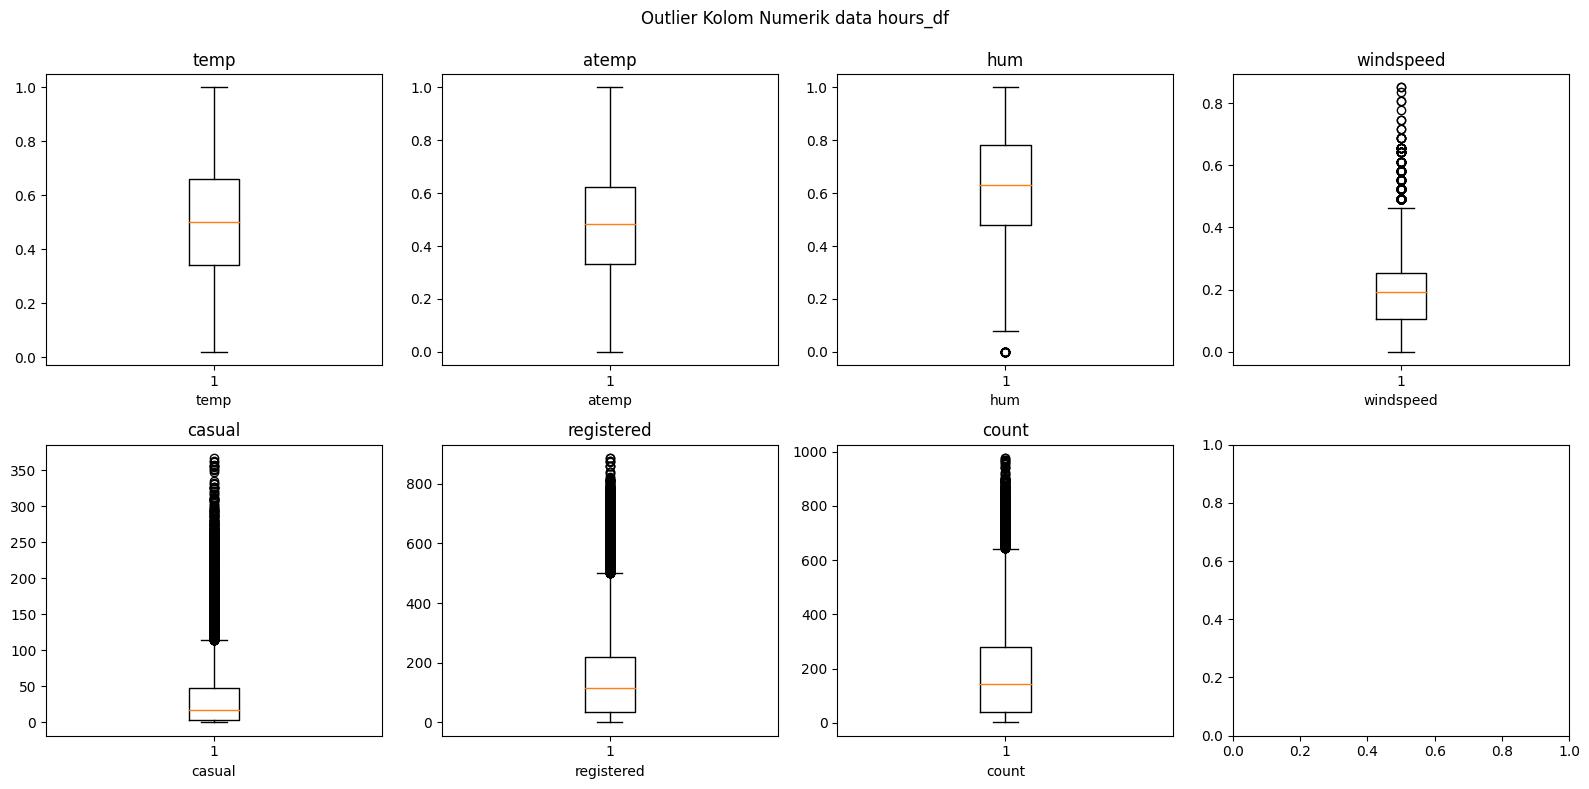

In [16]:
#Menampilkan outlier dalam boxplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Outlier Kolom Numerik data hours_df')

for i, column in enumerate(numeric_columns_hours):
    row = i // 4
    col = i % 4
    axes[row, col].boxplot(hours_df[column])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [17]:
# Mengatasi outlier pada kolom bernilai numerik dengan metode imputasi
def impute_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Imputasi outlier dengan batas atas dan batas bawah
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Imputasi outlier pada kolom 'hum' dan 'windspeed'
impute_outliers(hours_df, 'hum')
impute_outliers(hours_df, 'windspeed')
impute_outliers(hours_df,'casual')
impute_outliers(hours_df,'registered')
impute_outliers(hours_df,'count')

In [18]:
# Periksa kembali adanya outlier pada kolom bernilai numerik
numeric_columns_hours = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for column in numeric_columns_hours:
    outliers_hours = detect_outliers(hours_df, column)
    print(f'Outliers kolom {column}: {len(outliers_hours)}')

Outliers kolom temp: 0
Outliers kolom atemp: 0
Outliers kolom hum: 0
Outliers kolom windspeed: 0
Outliers kolom casual: 0
Outliers kolom registered: 0
Outliers kolom count: 0


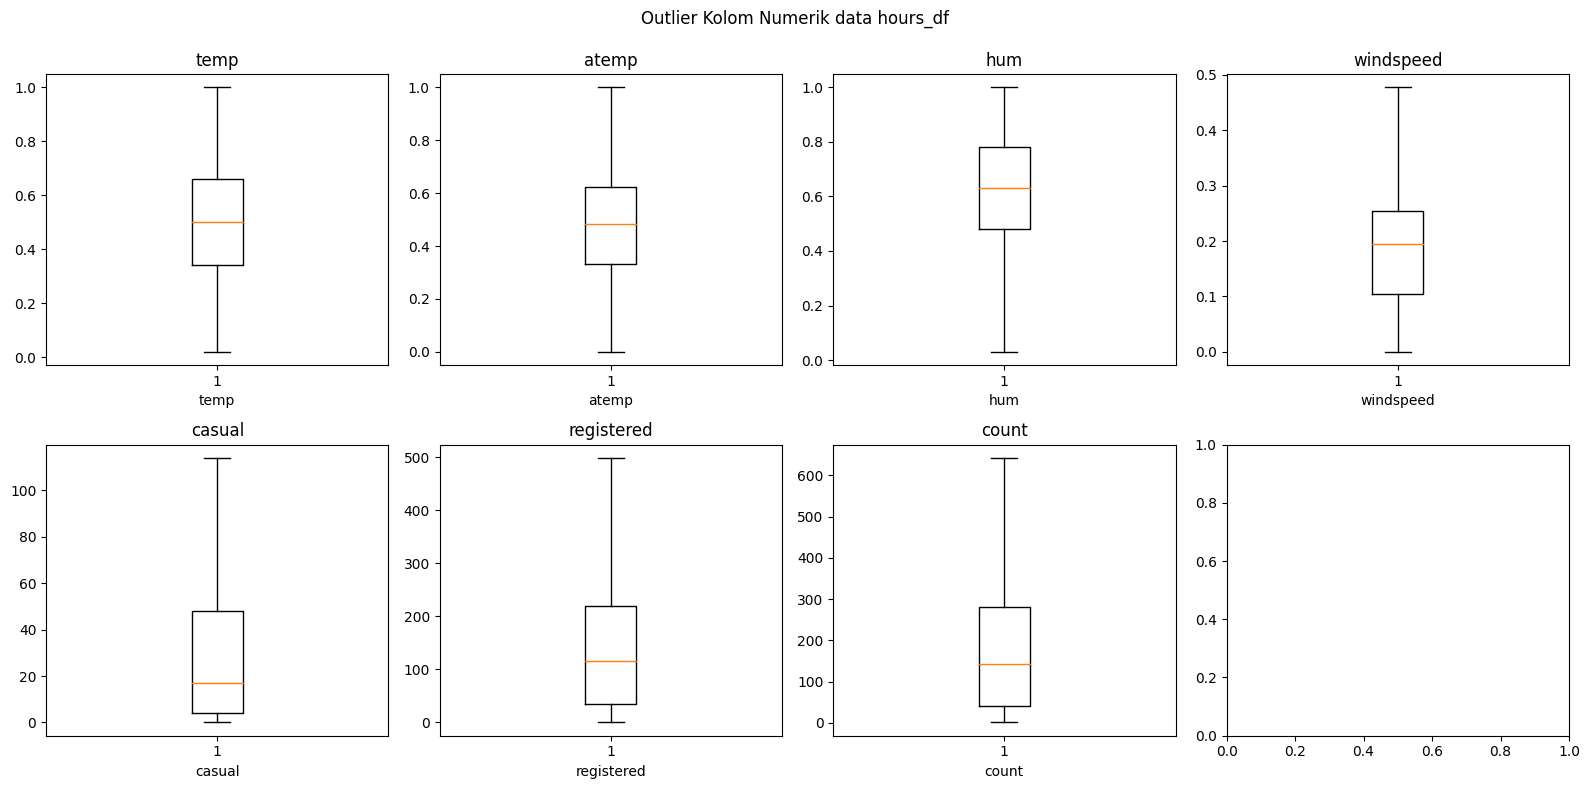

In [19]:
#Menampilkan outlier dalam boxplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Outlier Kolom Numerik data hours_df')

for i, column in enumerate(numeric_columns_hours):
    row = i // 4
    col = i % 4
    axes[row, col].boxplot(hours_df[column])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**Membersihkan data days_df:**

In [20]:
# Mengganti tipe data pada dteday menjadi datetime.
# Proses dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.
days_df['dteday'] = pd.to_datetime(days_df.dteday)
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memperbaiki judul kolom agar mudah dibaca

In [21]:
# Mengubah  judul kolom tabel hours_df
days_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)
days_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
days_df['season'] = days_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
days_df['year'] = days_df['year'].map({
    0: 2011, 1: 2012
})

In [23]:
# Mengubah kolom-kolom ke tipe data kategorikal
categorical_columns = ['season', 'year', 'month', 'holiday', 'workingday', 'weather']
days_df[categorical_columns] = days_df[categorical_columns].astype('category')
print(days_df.dtypes)

instant                int64
dateday       datetime64[ns]
season              category
year                category
month               category
holiday             category
weekday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [24]:
# Melihat deskripsi dari data bertipe category
days_df.describe(include=['category'])

,season,year,month,holiday,workingday,weather
count,731,731,731,731,731,731
unique,4,2,12,2,2,3
top,Fall,2012,1,0,1,1
freq,188,366,62,710,500,463


Terlihat bahwa:
1. Pada kolom season, ada 4 nilai unik dengan nilai 3 menjadi modus. Nilai 3 / musim spring memiliki frekuensi muncul sebanyak 188
2. Pada kolom year, ada 2 nilai unik dengan nilai 1 menjadi modus. Nilai 1 / tahun 2012  memiliki frekuensi muncul sebanyak 366
3. Pada kolom month, ada 12 nilai unik dengan nilai 5 menjadi modus. Nilai 1 / bulan januari memiliki frekuensi muncul sebanyak 62
4. Pada kolom holiday, ada 2 nilai unik dengan nilai 0 menjadi modus. Nilai 0 / bukan hari libur memiliki frekuensi muncul sebanyak 710
5. Pada kolom weekday, ada 7 nilai unik dengan nilai 6 menjadi modus. Nilai 0 / hari senin memiliki frekuensi muncul sebanyak 105
6. Pada kolom workingday, ada 2 nilai unik dengan nilai 1 menjadi modus. Nilai 1 / hari kerja memiliki frekuensi muncul sebanyak 500
7. Pada kolom weather, ada 3 nilai unik dengan nilai 1 menjadi modus. Nilai 1 / cuaca cerah memiliki frekuensi muncul sebanyak 463

Selanjutnya periksa outlier pada kolom numerik dan kolom kategorikal

In [25]:
# Periksa adanya outlier pada kolom bernilai numerik
numeric_columns_days = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']

for column in numeric_columns_days:
    outliers_days = detect_outliers(days_df, column)
    print(f'Outliers kolom {column}: {len(outliers_days)}')

Outliers kolom temp: 0
Outliers kolom atemp: 0
Outliers kolom hum: 2
Outliers kolom windspeed: 13
Outliers kolom casual: 44
Outliers kolom registered: 0
Outliers kolom count: 0


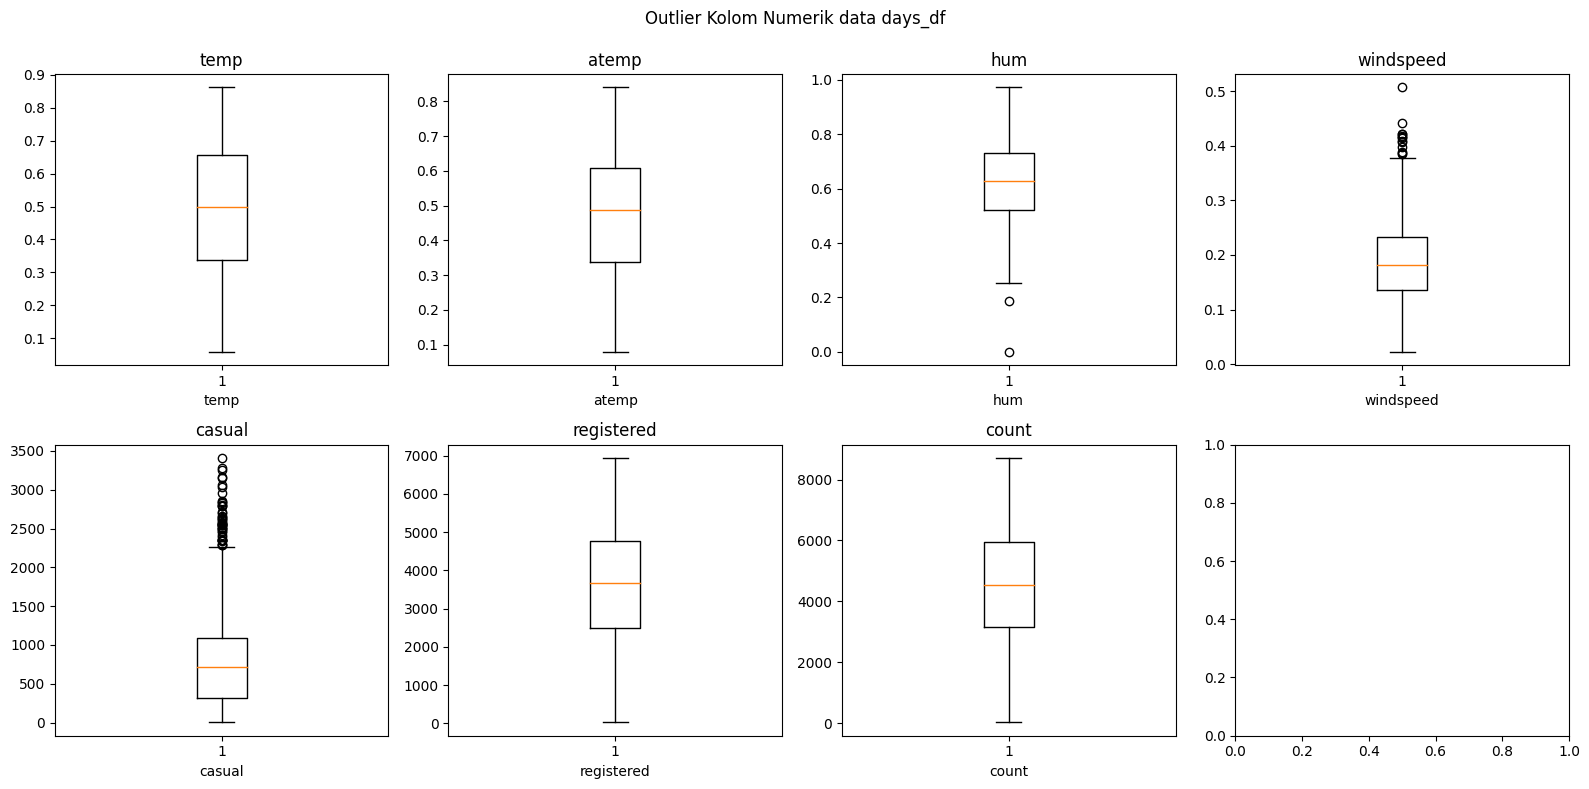

In [26]:
#Menampilkan outlier dalam boxplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Outlier Kolom Numerik data days_df')

for i, column in enumerate(numeric_columns_days):
    row = i // 4
    col = i % 4
    axes[row, col].boxplot(days_df[column])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [27]:
# Mengatasi outlier pada kolom bernilai numerik dengan metode imputasi
# Imputasi outlier pada kolom 'hum' dan 'windspeed'
impute_outliers(days_df, 'hum')
impute_outliers(days_df, 'windspeed')
impute_outliers(days_df,'casual')
impute_outliers(days_df,'registered')
impute_outliers(days_df,'count')

In [28]:
# Periksa kembali adanya outlier pada kolom bernilai numerik
numeric_columns_days = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']

for column in numeric_columns_days:
    outliers_days = detect_outliers(hours_df, column)
    print(f'Outliers kolom {column}: {len(outliers_days)}')

Outliers kolom temp: 0
Outliers kolom atemp: 0
Outliers kolom hum: 0
Outliers kolom windspeed: 0
Outliers kolom casual: 0
Outliers kolom registered: 0
Outliers kolom count: 0


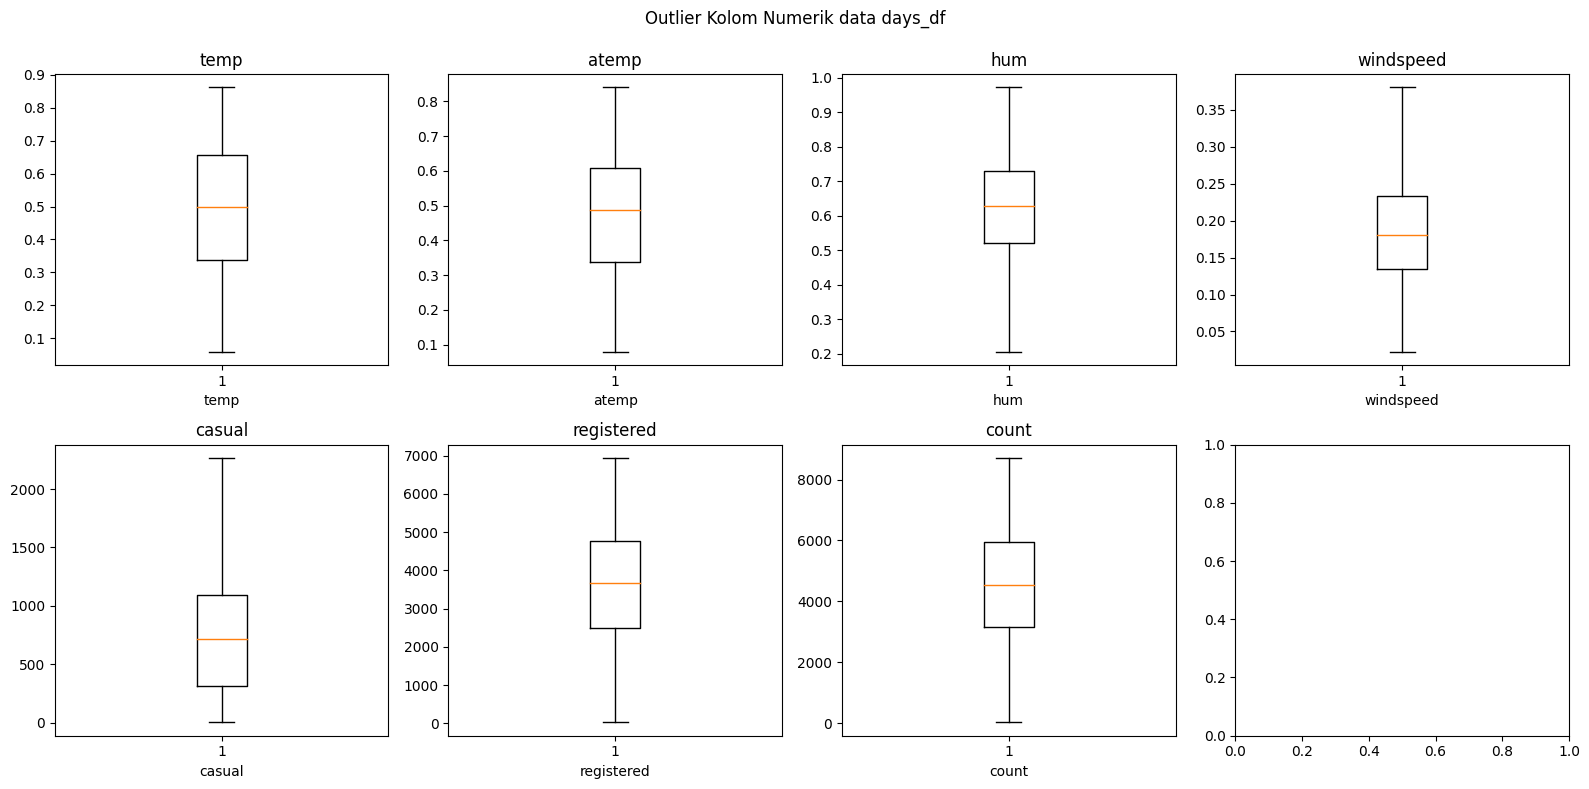

In [29]:
#Menampilkan outlier dalam boxplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Outlier Kolom Numerik data days_df')

for i, column in enumerate(numeric_columns_days):
    row = i // 4
    col = i % 4
    axes[row, col].boxplot(days_df[column])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Exploratory Data Analysis (EDA)

### Explore Data hours_df

In [30]:
# Mendeskripsikan parameter statistik pada data hours_df
hours_df.describe(include="all", datetime_is_numeric=True)

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12.0,24.0,2.0,NaN,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,5.0,17.0,0.0,NaN,1.0,"Clear, Few clouds",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488.0,730.0,16879.0,NaN,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,3.003683,NaN,NaN,0.496987,0.475775,0.627267,0.188691,31.158812,148.645204,186.361327
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000


In [31]:
# Mengelompokkan data berdasarkan weather
weather_agg = hours_df.groupby("weather", observed=True).agg({"count": ["max", "min", "mean", "sum"]})

# Merubah nama kolom agar mudah dipahami
weather_agg.columns = ["Max Count", "Min Count", "Average Count", "Total Count"]

# Menghapus index pada dataframe
weather_agg = weather_agg.reset_index()

# Menampilkan dataframe weather_aggregated_data
weather_agg

,weather,Max Count,Min Count,Average Count,Total Count
0,"Clear, Few clouds",642.5,1.0,201.057172,2294665.5
1,Mist + Cloudy,642.5,1.0,173.187060,786962.0
2,"Light Snow, Light Rain",642.5,1.0,110.587033,156923.0
3,Heavy Rain + Ice Pallets,164.0,23.0,74.333333,223.0


Berdasarkan pivot table diatas, kondisi weather 1 atau Clear, Few clouds, Partly cloudy, Partly cloudy merupakan cuaca paling disukai oleh pelanggan untuk menyewa sepeda. Sedangkan pelanggan paling sedikit menyewa sepeda pada weather 4 / cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. Hal ini ditunjukkan oleh kolom Total Count. Data ini berdasarkan cuaca per jam dimana dalam 1 hari bisa terjadi kondisi cuaca yang berbeda di jam yang berbeda

### Explore Data days_df

In [32]:
# Mendeskripsikan parameter statistik pada data hours_df
days_df.describe(include="all", datetime_is_numeric=True)

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731.0,731.0,731.000000,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12.0,2.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,1.0,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62.0,710.0,NaN,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.628197,0.189846,824.388509,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.380611,2266.750000,6946.000000,8714.000000


In [33]:
# Hitung rata-rata penyewaan sepeda per hari kerja dan hari libur untuk setiap tahun
daily_rentals = days_df.groupby(['year', 'workingday'])['instant'].mean().reset_index()

# Ubah kode workingday dan year menjadi label
workingday_map = {0: 'Holiday', 1: 'Working Day'}
daily_rentals['workingday'] = daily_rentals['workingday'].map(workingday_map)

# Buat pivot table
pivot_daily_rentals = daily_rentals.pivot(index='year', columns='workingday', values='instant')
pivot_daily_rentals

workingday,Holiday,Working Day
year,,
2011,183.721739,182.668
2012,549.387931,548.088


  Berdasarkan pivot tabel diatas, rata-rata penyewaan sepeda para hari libur dan hari kerja tidak berbeda jauh. Terlihat juga bahwa rata-rata penyewa dari tahun 2011 ke 2012 cukup meningkat pesat

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa rental sepeda pada tahun 2011-2012?

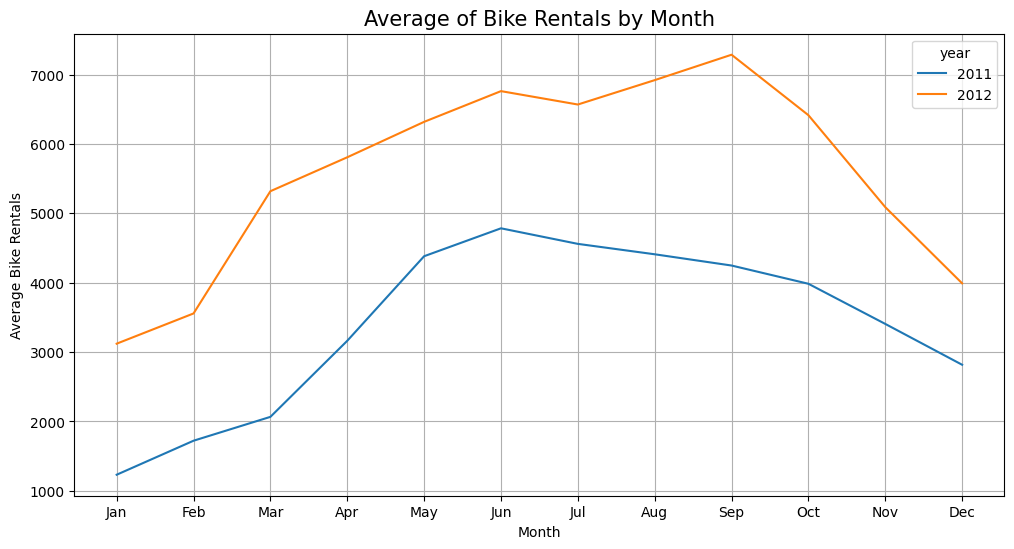

In [34]:
monthly_rental_df = days_df.groupby(['year', 'month'])[['count']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="count", hue="year",data=monthly_rental_df)
plt.xlabel("Month")
plt.ylabel("Average Bike Rentals")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.title("Average of Bike Rentals by Month", loc="center", fontsize=15)

plt.show()

### Pertanyaan 2: Pada cuaca apa sepeda paling banyak dipinjam dan paling sedikit dipinjam selama tahun 2011-2012?

<ipython-input-35-32a1586c5523>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Count", y="weather", data=weather_agg.sort_values(by="Total Count"), palette=colors, ax=ax)


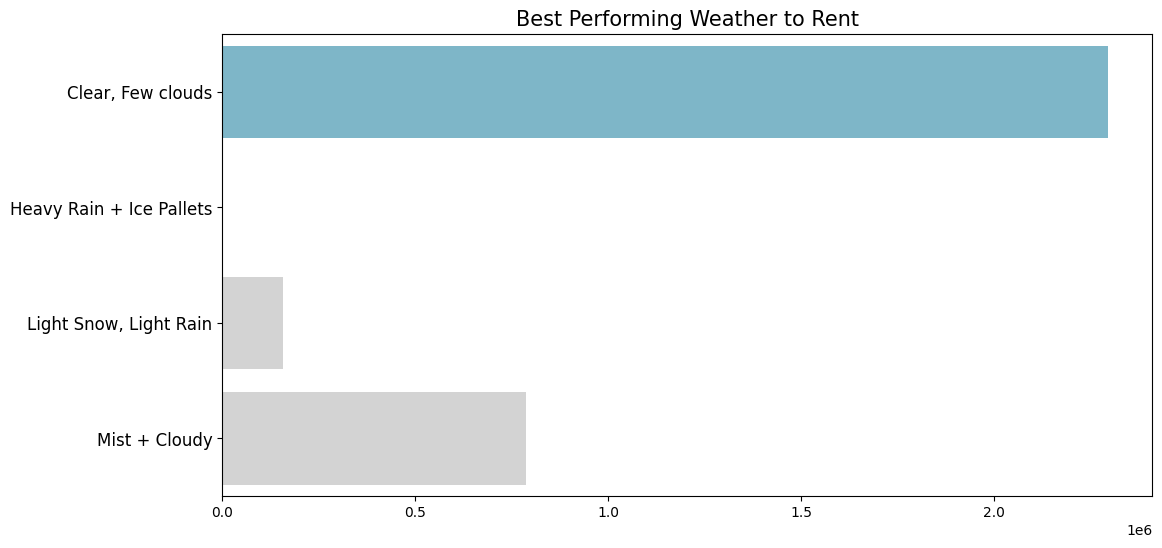

In [35]:
# bar chart
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="Total Count", y="weather", data=weather_agg.sort_values(by="Total Count"), palette=colors, ax=ax)
ax.set_ylabel(None)  # Remove y-axis label
ax.set_xlabel(None)  # Remove x-axis label
ax.set_title("Best Performing Weather to Rent", loc="center", fontsize=15)  # Set title
ax.tick_params(axis ='y', labelsize=12)  # Set y-axis tick label size

#plt.suptitle("Best and Worst Performing Weather to Rent from 2011-2012", fontsize=20)
plt.show()

### Pertanyaan 3: Berapa rata-rata penyewa rental sepeda pada hari kerja dan hari libur di tahun 2011-2012?

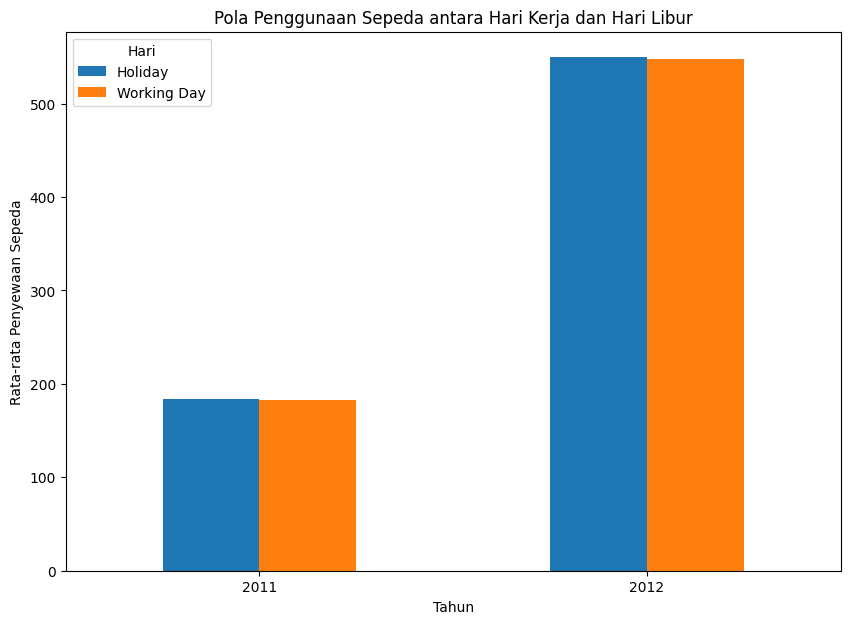

In [36]:
pivot_daily_rentals.plot(kind='bar', figsize=(10, 7))
plt.title('Pola Penggunaan Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=0)
plt.legend(title='Hari')
plt.show()

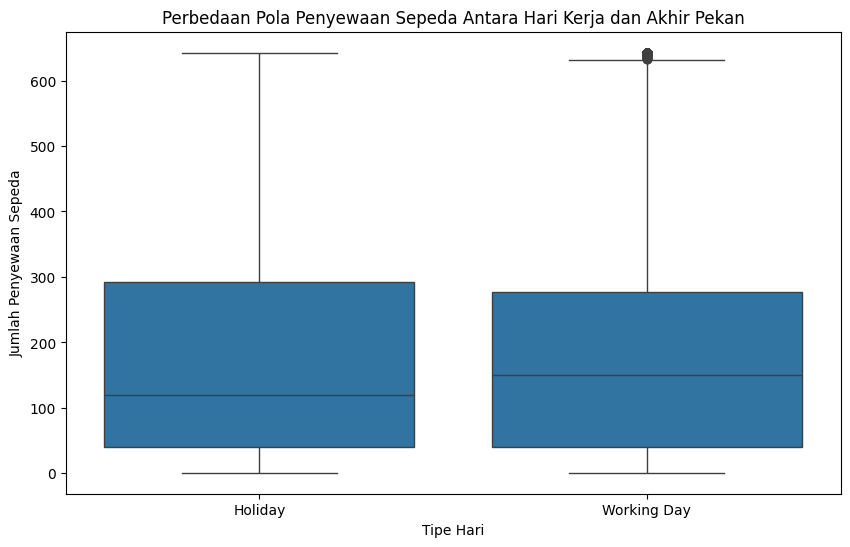

In [42]:
# Visualisasi perbedaan rental sepeda antara hari kerja dan akhir pekan
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=hours_df)
plt.title('Perbedaan Pola Penyewaan Sepeda Antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Holiday', 'Working Day'])
plt.show()

## Conclusion

- Conclusion pertanyaan 1:

  Hasil analisis menunjukkan performa rental sepeda cukup bagus ditunjukkan oleh **rata-rata penyewa sepeda setiap bulannya pada tahun 2012 mengalami peningkatan dibandingkan tahun  2011**. **Performa rental sepeda paling rendah adalah bulan januari di tahun 2011 dan 2012**, sedangkan **performa rental paling tinggi adalah bulan Juni 2011 dan bulan September 2012.**
  
- Conclusion pertanyaan 2:

  Hasil analisis menunjukkan bahwa **banyak customer yang menyewa sepeda pada cuaca yang cerah / indikator weather 1**. Hal ini menunjukkan bahwa variabel cuaca memiliki pengaruh pada jumlah penyewa.

- Conclusion pertanyaan 3:

  Hasil analisis menunjukkan bahwa **rata-rata penyewa sepeda pada hari libur (holiday) dan hari kerja (working day) menunjukkan perbedaan yang tidak begitu jauh.** Namun, asumsi bahwa durasi hari kerja lebih lama daripada hari libur secara implisit menyatakan bahwa jumlah penyewa pada hari libur (2 days) cukup untuk menyaingi total penyewa pada hari kerja (5 days)

## RFM Analysis

In [43]:
# RFM Analysis untuk
rfm_df = days_df.groupby(by="instant", as_index=False).agg({
    "dateday": "max",       # Mengambil tanggal terakhir penyewaan sepeda dilakukan
    "weekday": "max",      # Mengambil hari dengan penyewaan terbanyak
    "count": "sum"           # Menghitung jumlah penyewaan yang telah dilakukan
})

# Rename the columns for clarity
rfm_df.columns = [
    "instant",
    "recent_date",  # Diganti menjadi recent_date agar lebih jelas
    "frequency",
    "monetary"
]

# Menghitung kapan terakhir pelanggan melakukan transaksi (tanggal)
recent_date = rfm_df['recent_date'].max()
rfm_df["recency"] = (recent_date - rfm_df["recent_date"]).dt.days

# Menghapus kolom 'recent_date' karena sudah tidak diperlukan lagi
rfm_df.drop("recent_date", axis=1, inplace=True)
rfm_df.head(7)


,instant,frequency,monetary,recency
0,1,6,985,730
1,2,0,801,729
2,3,1,1349,728
3,4,2,1562,727
4,5,3,1600,726
5,6,4,1606,725
6,7,5,1510,724


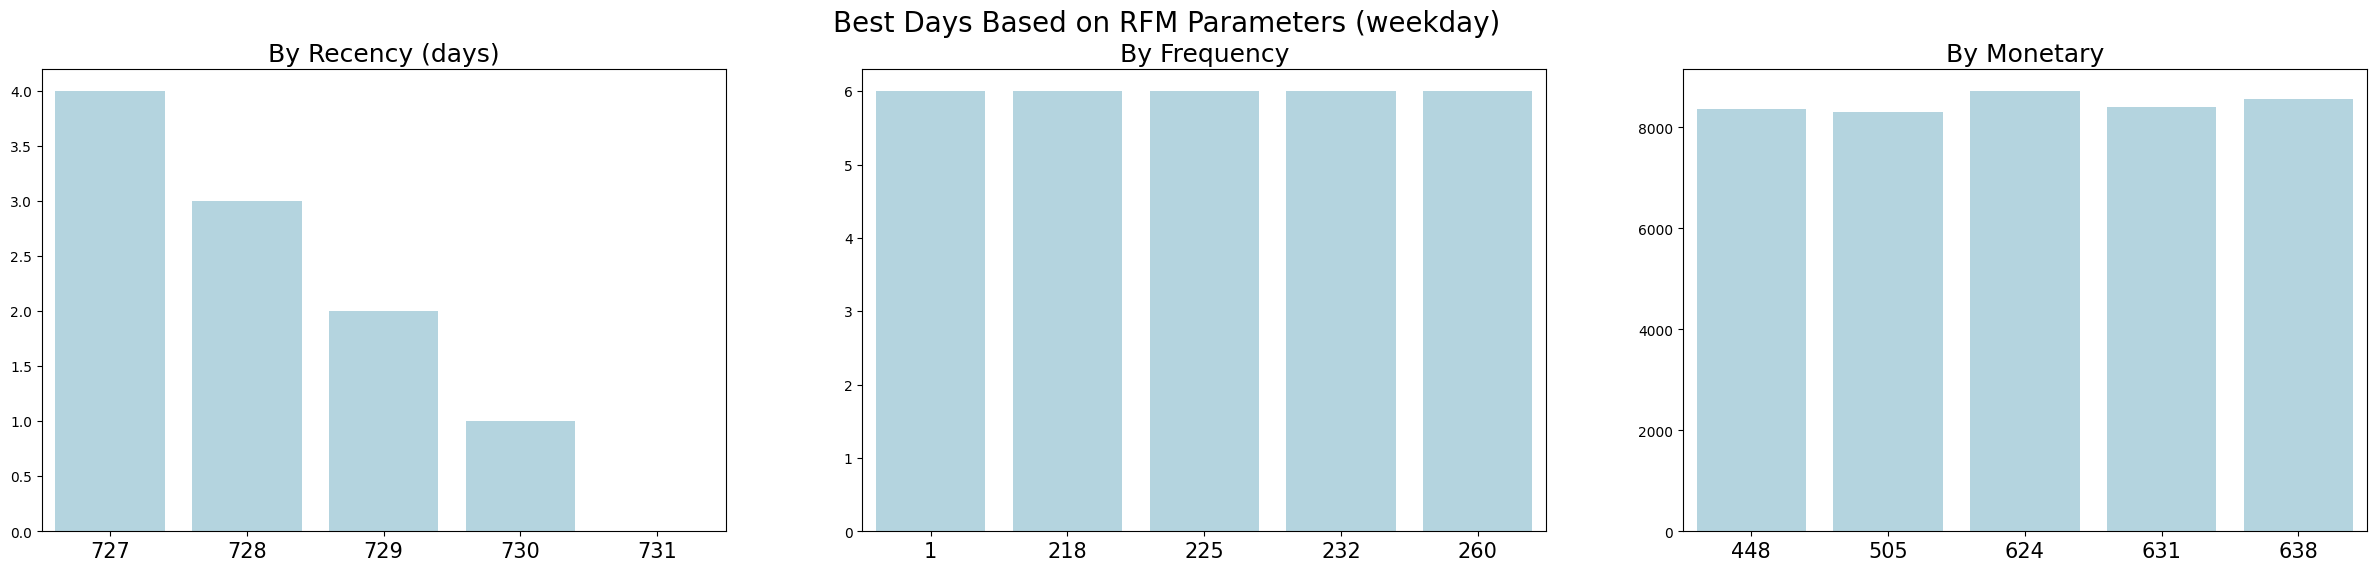

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))


sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color="lightblue",ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color="lightblue", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color="lightblue", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Days Based on RFM Parameters (weekday)", fontsize=20)
plt.show()

In [45]:
hours_df.to_csv("all_data.csv", index=False)